<h2>Library</h2>

In [28]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')

<h2>Functions</h2>

In [58]:
def y_fmt_k(y, _):
    if y >= 1000:
        value = int(y / 1000)
        return f'{value}k'
    elif y < 1:
        return f'{y:.2f}'
    else:
        return str(int(y))

def calculate_click_rate(df):
    df['Click Rate'] = (df['Clicks'] / df['Impressions']) * 100
    return df

def calculate_cpm(df):
    df['CPM'] = (df['Spend'] / (df['Impressions'] / 1000))
    return df


def plot_country_data(df, title):
    fig, axes = plt.subplots(1, 4, figsize=(18, 5))
    fig.suptitle(title, fontsize=16)

    df_impressions = df.groupby(['Fiscal Week', 'Provider'])['Impressions'].sum().reset_index()
    df_clicks = df.groupby(['Fiscal Week', 'Provider'])['Clicks'].sum().reset_index()

    # Calculate the click rate
    df = calculate_click_rate(df)
    df_click_rate = df.groupby(['Fiscal Week', 'Provider'])['Click Rate'].mean().reset_index()

    # Calculate the CPM
    df = calculate_cpm(df)
    df_cpm = df.groupby(['Fiscal Week', 'Provider'])['CPM'].mean().reset_index()

    df_impressions.pivot(index='Fiscal Week', columns='Provider', values='Impressions').plot(kind='bar', ax=axes[0])
    df_clicks.pivot(index='Fiscal Week', columns='Provider', values='Clicks').plot(kind='bar', ax=axes[1])
    df_click_rate.pivot(index='Fiscal Week', columns='Provider', values='Click Rate').plot(kind='bar', ax=axes[2])
    df_cpm.pivot(index='Fiscal Week', columns='Provider', values='CPM').plot(kind='bar', ax=axes[3])  # Add the CPM chart

    for ax in axes:
        ax.set_xlabel('Fiscal Week', fontsize=8)
        ax.set_ylabel('Value', fontsize=8)
        ax.legend(fontsize=6)
        ax.tick_params(axis='x', rotation=90)
        ax.yaxis.set_major_formatter(FuncFormatter(y_fmt_k))

    axes[0].set_title('Impressions', fontsize=10)
    axes[1].set_title('Clicks', fontsize=10)
    axes[2].set_title('Click Rate', fontsize=10)
    axes[3].set_title('CPM', fontsize=10)  # Set the title for the CPM chart

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [30]:
audiences = {'Country': {1: 'AU', 2: 'AU', 4: 'BR', 5: 'BR', 7: 'CA', 8: 'CA', 10: 'FR'},
 'Number': {1: 2, 2: 3, 4: 2, 5: 3, 7: 2, 8: 3, 10: 2},
 'Provider': {1: 'AIQ',
  2: 'LR',
  4: 'AIQ',
  5: 'LR',
  7: 'AIQ',
  8: 'LR',
  10: 'AIQ'},
 'Segment ID': {1: 'd2q11zclsgv',
  2: 'dgfrrpdw7ov',
  4: 'dwm57ismy2g',
  5: 'd3ok01g6usv',
  7: 'd7qd2wu3gkb',
  8: 'dw1v0i89ctr',
  10: 'd14s5u5pfra'}}

df_audiences = pd.DataFrame(audiences)

df_audiences

,Country,Number,Provider,Segment ID
1,AU,2,AIQ,d2q11zclsgv
2,AU,3,LR,dgfrrpdw7ov
4,BR,2,AIQ,dwm57ismy2g
5,BR,3,LR,d3ok01g6usv
7,CA,2,AIQ,d7qd2wu3gkb
8,CA,3,LR,dw1v0i89ctr
10,FR,2,AIQ,d14s5u5pfra


<h2>Dataset</h2>

In [31]:
folder_path = r'C:\Users\Rafael_Fagundes\Downloads\compiled_data.csv'

df = pd.read_csv(folder_path)

In [32]:
filtered_df = df[df['Segment ID'].isin(df_audiences['Segment ID'])]

In [33]:
merged_df = pd.merge(filtered_df, df_audiences, on=['Segment ID'], how='left')

In [34]:
merged_df['Country'].unique()

array(['CA', 'FR', 'AU'], dtype=object)

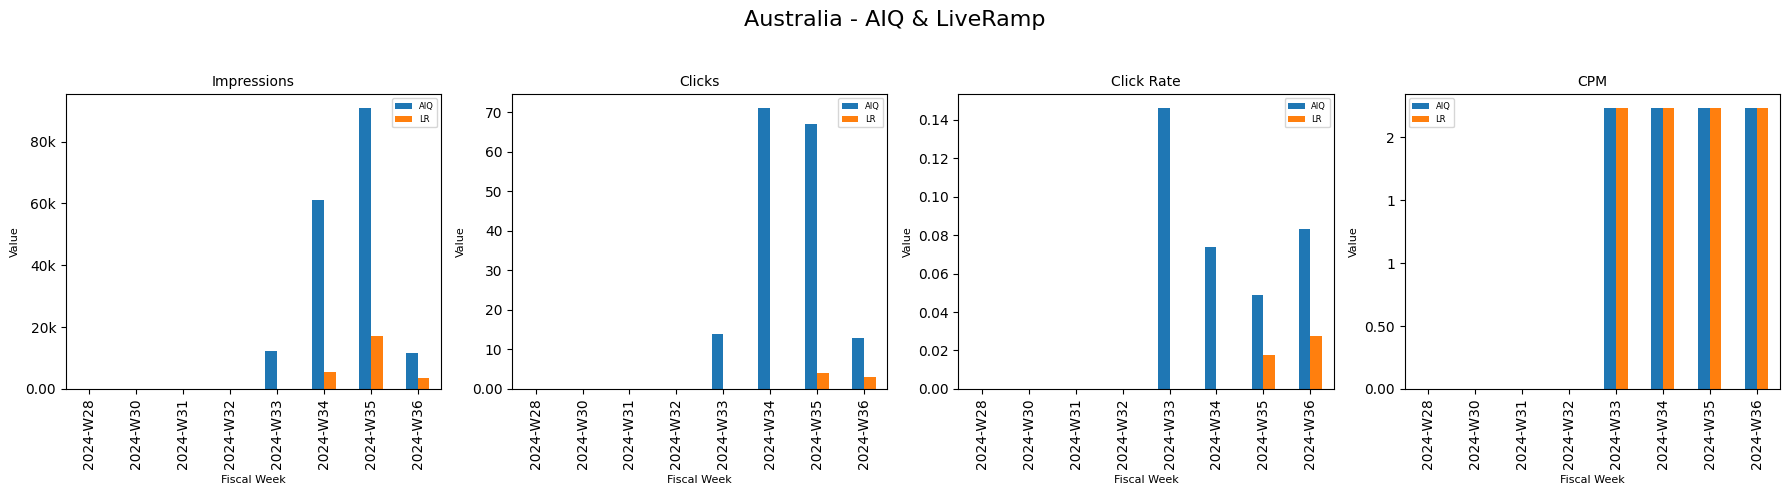

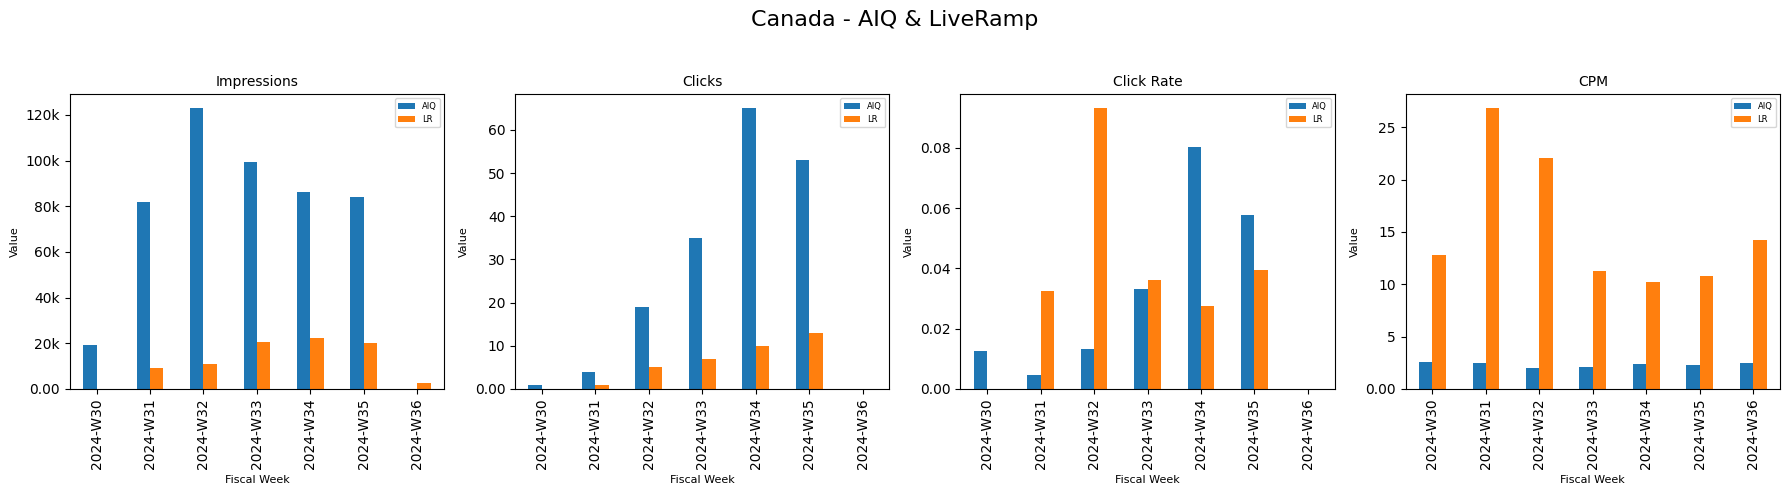

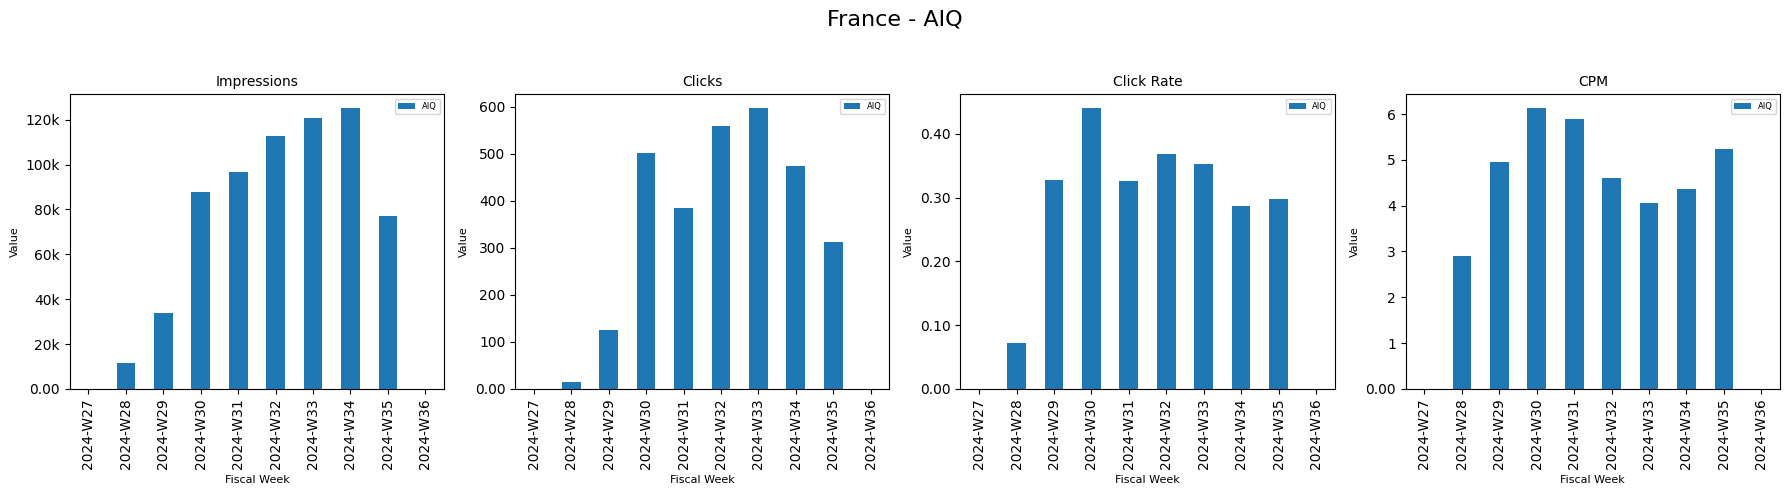

In [59]:
# Filter data for AU, BR, CA & FR
df_au = merged_df[merged_df['Country'].str.contains('AU')]
#df_br = filtered_df[df['Country'].str.contains('BR')]
df_ca = merged_df[merged_df['Country'].str.contains('CA')]
df_fr = merged_df[merged_df['Country'].str.contains('FR')]

# Plot data
plot_country_data(df_au, 'Australia - AIQ & LiveRamp')
#plot_country_data(df_br, 'Brazil - AIQ & LiveRamp')
plot_country_data(df_ca, 'Canada - AIQ & LiveRamp')
plot_country_data(df_fr, 'France - AIQ')